In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

### BW Nmeas Depth
look for critical point & scaling with A & C sites

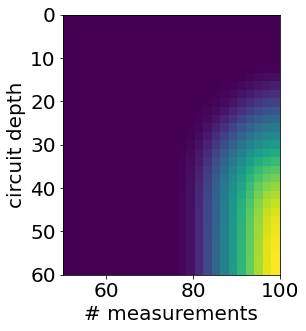

In [3]:
file_name = "data/230226/230226_nd1_pp.npz"

raw = np.load(file_name)
n_meas_l  = raw['n_meas_l']
depth_l  = raw['depth_l']
cmi_ave_l = raw['cmi_ave_l']
cmi_std_l = raw['cmi_std_l']

plt.rcParams["figure.figsize"] = (6,5)
plt.imshow(cmi_ave_l,extent=[n_meas_l[0],n_meas_l[-1],depth_l[-1],depth_l[0]])
plt.xlim([50,100])
plt.xlabel("# measurements")
plt.ylabel("circuit depth")
plt.tight_layout()

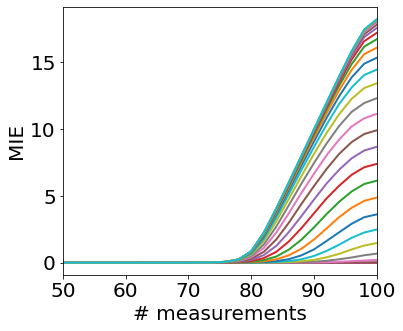

In [4]:
for i in range(0,30,1):
    plt.plot(n_meas_l,cmi_ave_l[i,:])
# plt.yscale('log')

plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([50,100])
plt.xlabel("# measurements")
plt.ylabel("MIE")
plt.tight_layout()

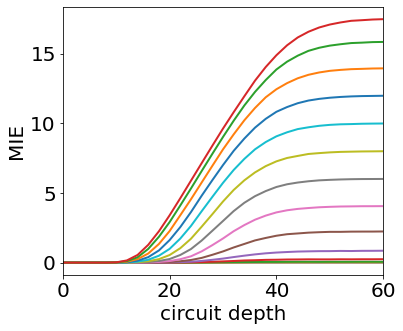

In [5]:
for i in range(35,49):
    plt.plot(depth_l,cmi_ave_l[:,i])
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([0,60])
plt.xlabel("circuit depth")
plt.ylabel("MIE")
plt.tight_layout()

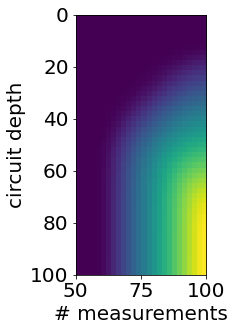

In [32]:
file_name = "data/230305/230305_nd3_pp.npz"

raw = np.load(file_name)
n_meas_l  = raw['n_meas_l']
depth_l  = raw['depth_l']
cmi_ave_l = raw['cmi_ave_l']
cmi_std_l = raw['cmi_std_l']

plt.rcParams["figure.figsize"] = (6,5)
plt.imshow(cmi_ave_l,extent=[n_meas_l[0],n_meas_l[-1],depth_l[-1],depth_l[0]])
plt.xlim([50,100])
plt.xlabel("# measurements")
plt.ylabel("circuit depth")
plt.tight_layout()

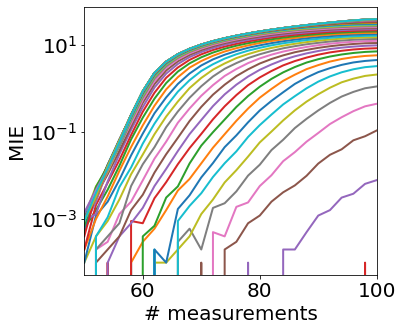

In [34]:
for i in range(0,50,1):
    plt.plot(n_meas_l,cmi_ave_l[i,:])
plt.yscale('log')

plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([50,100])
plt.xlabel("# measurements")
plt.ylabel("MIE")
plt.tight_layout()

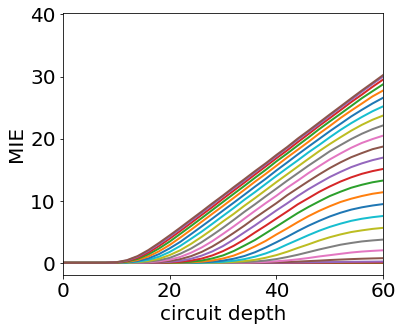

In [39]:
for i in range(0,26,1):
    plt.plot(depth_l,cmi_ave_l[:,i])
# plt.yscale('log')
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([0,60])
plt.xlabel("circuit depth")
plt.ylabel("MIE")
plt.tight_layout()

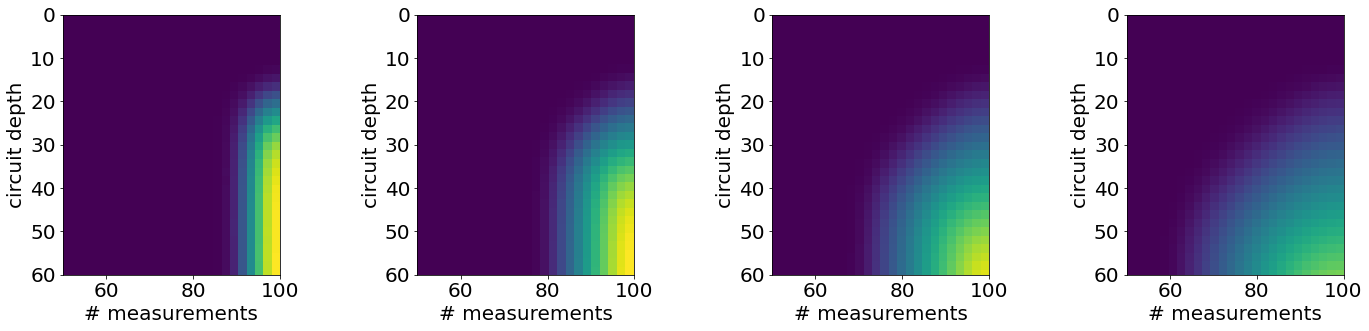

In [62]:
file_name_l = [
    "data/230305/230305_nd1_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd2_pp.npz",
    "data/230305/230305_nd3_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    plt.subplot(1,4,i+1)
    # plt.rcParams["figure.figsize"] = (6,5)
    plt.imshow(cmi_ave_l,extent=[n_meas_l[0],n_meas_l[-1],depth_l[-1],depth_l[0]])
    plt.xlim([50,100])
    plt.ylim([60,0])
    plt.xlabel("# measurements")
    plt.ylabel("circuit depth")
plt.tight_layout()

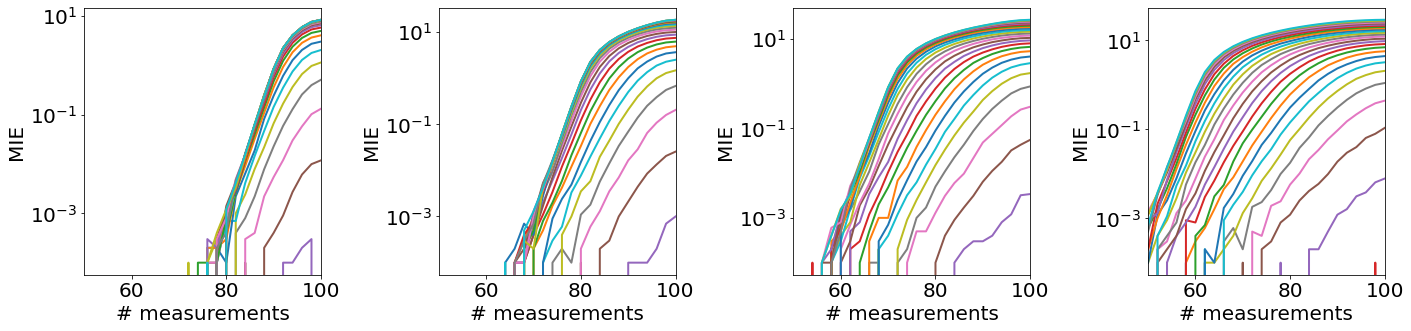

In [63]:
file_name_l = [
    "data/230305/230305_nd1_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd2_pp.npz",
    "data/230305/230305_nd3_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']
    
    if i == 1:
        range_end = 30
    else:
        range_end = 50

    plt.subplot(1,4,i+1)
    for j in range(0,30,1):
        plt.plot(n_meas_l,cmi_ave_l[j,:])
    plt.yscale('log')

    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([50,100])
    plt.xlabel("# measurements")
    plt.ylabel("MIE")
plt.tight_layout()

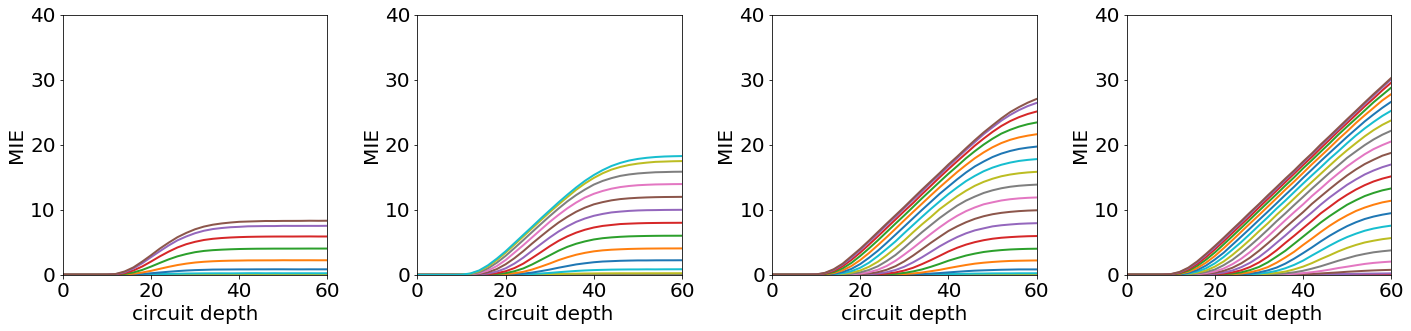

In [71]:
file_name_l = [
    "data/230305/230305_nd1_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd2_pp.npz",
    "data/230305/230305_nd3_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    if i == 1:
        range_end = 50
    else:
        range_end = 26

    plt.subplot(1,4,i+1)
    for i in range(0,range_end,1):
        plt.plot(depth_l,cmi_ave_l[:,i])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([0,60])
    plt.ylim([0,40])
    plt.xlabel("circuit depth")
    plt.ylabel("MIE")
plt.tight_layout()

In [72]:
def findCritPt(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return depth_l[mid_idx] - cmi_ave[mid_idx]*(depth_l[mid_idx+1]-depth_l[mid_idx-1])/(cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])
    # return depth_l[mid_idx]

In [65]:
def findCritSlope(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return (cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])/(depth_l[mid_idx+1]-depth_l[mid_idx-1])
    # return depth_l[mid_idx]

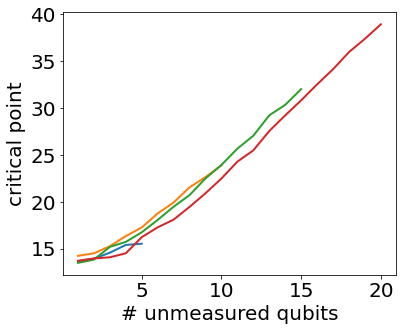

In [74]:
file_name_l = [
    "data/230305/230305_nd1_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd2_pp.npz",
    "data/230305/230305_nd3_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    if i == 1:
        range_end = 50
    else:
        range_end = 26

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 5*i+5
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritPt(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("critical point")
plt.tight_layout()

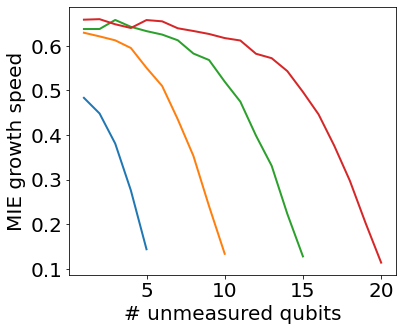

In [70]:
file_name_l = [
    "data/230305/230305_nd1_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd2_pp.npz",
    "data/230305/230305_nd3_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    if i == 1:
        range_end = 50
    else:
        range_end = 26

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 5*i+5
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritSlope(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("MIE growth speed")
plt.tight_layout()

### BW Nmeas Depth
look for critical point & scaling with B sites

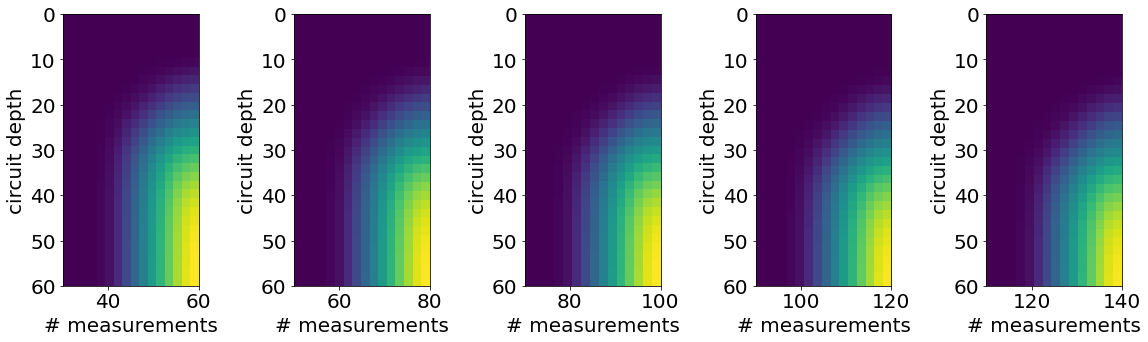

In [29]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    plt.subplot(1,5,i+1)
    # plt.rcParams["figure.figsize"] = (6,5)
    plt.imshow(cmi_ave_l,extent=[n_meas_l[0],n_meas_l[-1],depth_l[-1],depth_l[0]])
    plt.xlim([(i*20+60)-30,i*20+60])
    plt.ylim([60,0])
    plt.xlabel("# measurements")
    plt.ylabel("circuit depth")
    # plt.title()
# plt.tight_layout()

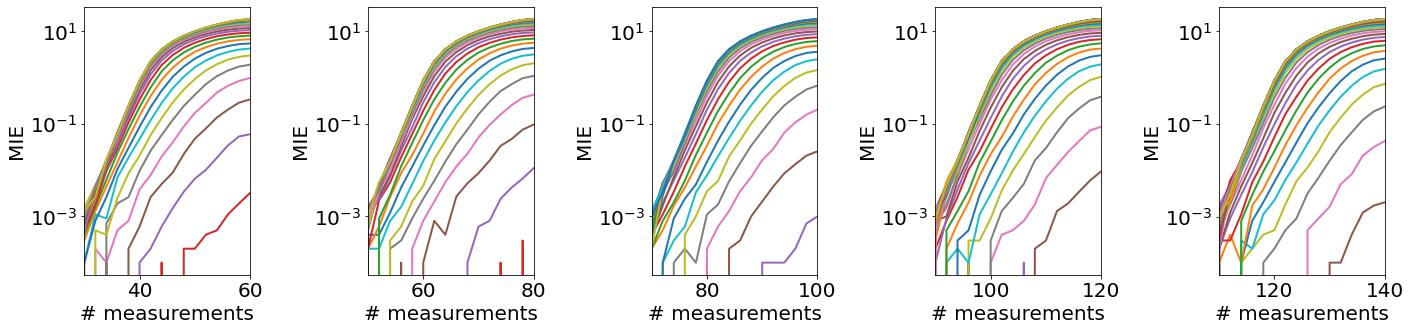

In [78]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    if i == 2:
        range_end = 31
    else:
        range_end = 10*i+29

    plt.subplot(1,5,i+1)
    for j in range(0,range_end,1):
        plt.plot(n_meas_l,cmi_ave_l[j,:])
    plt.yscale('log')

    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([(i*20+60)-30,i*20+60])
    plt.xlabel("# measurements")
    plt.ylabel("MIE")
plt.tight_layout()

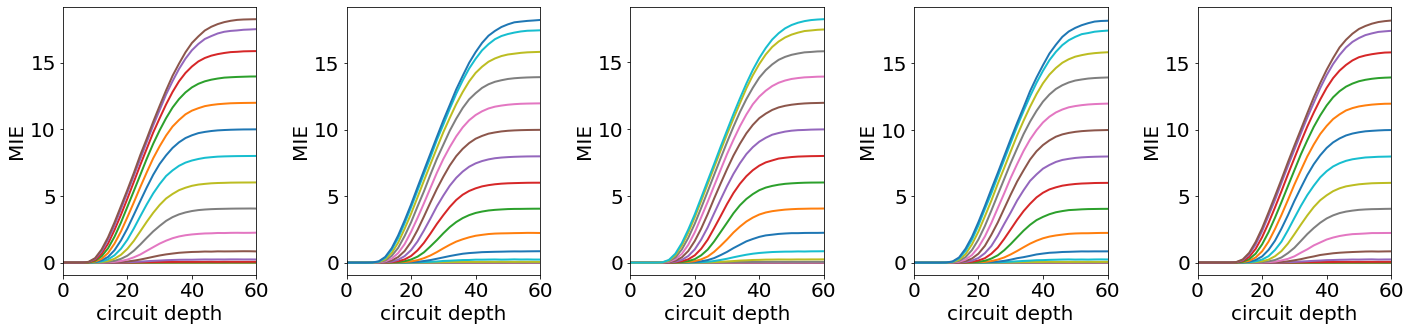

In [87]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (20,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    if i == 2:
        range_end = 50
    else:
        range_end = 5*i+16

    plt.subplot(1,5,i+1)
    for j in range(0,range_end,1):
        plt.plot(depth_l,cmi_ave_l[:,j])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([0,60])
    plt.xlabel("circuit depth")
    plt.ylabel("MIE")
plt.tight_layout()

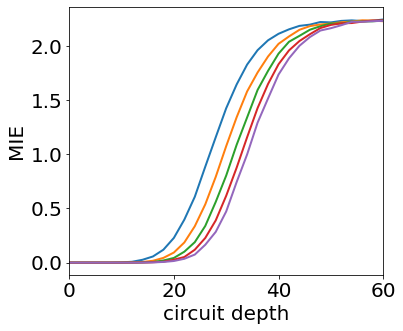

In [51]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']

    plt.plot(depth_l,cmi_ave_l[:,-10])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    plt.xlim([0,60])
    plt.xlabel("circuit depth")
    plt.ylabel("MIE")
plt.tight_layout()

In [53]:
def findCritPt(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return depth_l[mid_idx] - cmi_ave[mid_idx]*(depth_l[mid_idx+1]-depth_l[mid_idx-1])/(cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])
    # return depth_l[mid_idx]

In [54]:
def findCritSlope(depth_l,cmi_ave):
    mid_pt = np.max(cmi_ave)/2
    mid_idx = np.argmin(np.abs(cmi_ave-mid_pt))
    # print(mid_idx)
    return (cmi_ave[mid_idx+1]-cmi_ave[mid_idx-1])/(depth_l[mid_idx+1]-depth_l[mid_idx-1])
    # return depth_l[mid_idx]

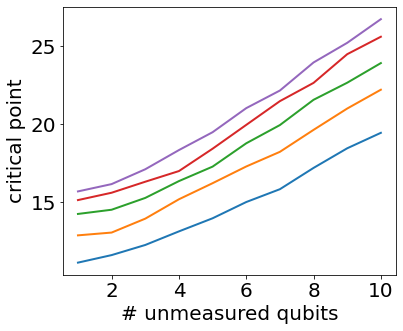

In [55]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    if i == 2:
        range_end = 50
    else:
        range_end = 5*i+16

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 10
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritPt(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("critical point")
plt.tight_layout()

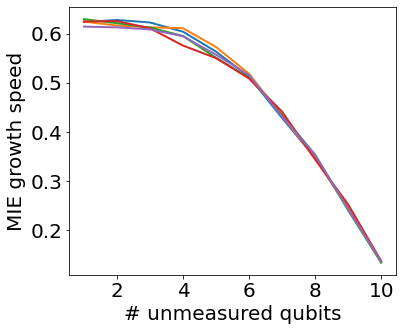

In [57]:
file_name_l = [
    "data/230305/230305_nd4_pp.npz",
    "data/230305/230305_nd5_pp.npz",
    "data/230226/230226_nd1_pp.npz",
    "data/230305/230305_nd6_pp.npz",
    "data/230305/230305_nd7_pp.npz"
]

plt.rcParams["figure.figsize"] = (6,5)
for i, file_name in enumerate(file_name_l):
    raw = np.load(file_name)
    n_meas_l  = raw['n_meas_l']
    depth_l  = raw['depth_l']
    cmi_ave_l = raw['cmi_ave_l']
    cmi_std_l = raw['cmi_std_l']


    if i == 2:
        range_end = 50
    else:
        range_end = 5*i+16

    # plt.subplot(1,5,i+1)
    nmeas_cutoff = 10
    critPt = np.zeros((nmeas_cutoff,))
    for j in range(range_end-nmeas_cutoff,range_end,1):
        critPt[j-(range_end-nmeas_cutoff)] = findCritSlope(depth_l,cmi_ave_l[:,j])
    plt.plot(np.arange(1,nmeas_cutoff+1),critPt[::-1])
    # plt.yscale('log')
    plt.rcParams["figure.figsize"] = (6,5)
    # plt.xlim([0,60])
    plt.xlabel("# unmeasured qubits")
    plt.ylabel("MIE growth speed")
plt.tight_layout()